<a href="https://colab.research.google.com/github/Sylwia0506/Computer-Vision/blob/main/Rozpoznawanie_obraz%C3%B3w.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### **Rozpoznawanie** **obrazów**

Sztuczna inteligencja ma bardzo szerokie zastosowania, które niejednokrotnie ułatwiają nam wykonywanie wielu czynności w  codziennym życiu.
Celem naszego projektu jest więc ukazanie kilku wybranych zastosowań Computer Vision, który umożliwia na wysokopoziomowe "rozumienie" zdjęć oraz wideo.
* Super Resolution - pozwala na zwiększenie rozdzielczości obrazu
* Object Detection - umożliwia rozpoznawanie obiektów na obrazku
* Instance Segmentation, czyli rozponaniu które konkretne piksele obrazka   należą do rozpoznawanych klas



Aby pokazać jak funkcjonują wytrenowane sieci neuronowe użyjemy Intelowej dystrybucji OpenVino™ Toolkit - zestawu narzędzi do pracy z modelami Deep Learningowym (https://software.intel.com/content/www/us/en/develop/tools/openvino-toolkit.html). 

OpenVino™  to zestaw narzędzi umożliwiających tworzenienie aplikacji i rozwiązań, które rozwiązują różne zadania m.in.: 
* automatyczne rozpoznawania mowy
* przetwarzanie języka naturalnego
* systemy rekomendacyjnych, itd.

Narzędzie oparte jest na najnowszych generacjach sieci neuronowych. Należą do nich m.in.:
* głębokie konwolucyjne sieci (CNN) , które potrafią filtrować różne części danych uczących i wyostrzać ważne cechy w procesie dyskryminacji
wykorzystanym do rozpoznawania lub klasyfikacji wzorców
* sieci rekurencyjne, czyli sieci ze sprzężeniami zwrotnymi: zmiana stanu jednego neuronu przenosi się przez masowe sprzężenie zwrotne na całą sieć wywołując stan przejściowy, kończący się określonym stanem ustalonym, na ogół innym niż poprzedni



W naszym przypadku nie będziemy pruszać wszystkich możliwości narzędzia. Skupimy się przede wszystkim mechanizem wnioskowania, który umożliwia nam Inference Engine.
Jest komponent umożliwiający załadowanie modelu i wykonanie na nim inferencji - przepuszczenia przez sieć neuronową wybranych przez nas danych i otrzymanie wyniku działania sieci. 

In [ ]:
# Instalacja OpenVino w środowisku Colaboratory
!wget -O openvino-key https://apt.repos.intel.com/openvino/2021/GPG-PUB-KEY-INTEL-OPENVINO-2021
!apt-key add openvino-key 
!echo "deb https://apt.repos.intel.com/openvino/2021 all main" | sudo tee /etc/apt/sources.list.d/intel-openvino-2021.list
!apt update #Aktualizacja pakietu
!apt install intel-openvino-dev-ubuntu18-2021.3.394 
!apt install  intel-openvino-dl-workbench-2021.3.394 intel-openvino-docs-2021.3.394
!apt install  intel-openvino-eula-2021.3.394
!apt install intel-openvino-gstreamer-rt-ubuntu-bionic-2021.3.394
!apt install  intel-openvino-gva-dev-ubuntu-bionic-2021.3.394
!apt install intel-openvino-gva-rt-ubuntu-bionic-2021.3.394


--2021-06-14 20:19:14--  https://apt.repos.intel.com/openvino/2021/GPG-PUB-KEY-INTEL-OPENVINO-2021
Resolving apt.repos.intel.com (apt.repos.intel.com)... 184.87.69.109, 2600:1408:5400:396::4b23, 2600:1408:5400:390::4b23
Connecting to apt.repos.intel.com (apt.repos.intel.com)|184.87.69.109|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 939 [binary/octet-stream]
Saving to: ‘openvino-key’

openvino-key        100%[===================>]     939  --.-KB/s    in 0s      

2021-06-14 20:19:14 (41.9 MB/s) - ‘openvino-key’ saved [939/939]

OK
deb https://apt.repos.intel.com/openvino/2021 all main
Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:3 https://apt.repos.intel.com/openvino/2021 all InRelease
Ign:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRele

Modele z których będziemy korzystać pochodzą z Open Model Zoo (https://github.com/openvinotoolkit/open_model_zoo) - katalogu zawierającego gotowe do użycia modele z różnych dziedzin sztucznej inteligencji.

### Na samym początku skupimy się na modelu Super Resolution, który pozwala nam na zwiększenie obrazu.
Porównujemy dwa przypadki: 
* w pierwszym przypadku obraz zostaje powiększony tradycyjnie przez zwiększenie jego wymiarów
* w drugim obraz wejściowy trafia do sieci neuronowej, przy pomocy której jego rozdzielczość zwiększana jest trzykrotnie



In [ ]:
# Pobieranie modelu Super Resolution
!python /opt/intel/openvino_2021/deployment_tools/tools/model_downloader/downloader.py --name single-image-super-resolution-1033

################|| Downloading single-image-super-resolution-1033 ||################

========== Downloading /content/intel/single-image-super-resolution-1033/FP32/single-image-super-resolution-1033.xml
... 100%, 54 KB, 406 KB/s, 0 seconds passed

========== Downloading /content/intel/single-image-super-resolution-1033/FP32/single-image-super-resolution-1033.bin
... 100%, 118 KB, 596 KB/s, 0 seconds passed

========== Downloading /content/intel/single-image-super-resolution-1033/FP16/single-image-super-resolution-1033.xml
... 100%, 54 KB, 413 KB/s, 0 seconds passed

========== Downloading /content/intel/single-image-super-resolution-1033/FP16/single-image-super-resolution-1033.bin
... 100%, 59 KB, 451 KB/s, 0 seconds passed

========== Downloading /content/intel/single-image-super-resolution-1033/FP16-INT8/single-image-super-resolution-1033.xml
... 100%, 140 KB, 2090 KB/s, 0 seconds passed

========== Downloading /content/intel/single-image-super-resolution-1033/FP16-INT8/single-image-

Modele w formacie IR, natywnym dla Intel® Distribution of OpenVino™ Toolkit składają się z pary plików w formacie .bin i .xml. 

In [ ]:
!ls -la intel/single-image-super-resolution-1033/FP16

total 124
drwxr-xr-x 2 root root  4096 Jun 14 18:28 .
drwxr-xr-x 5 root root  4096 Jun 14 18:28 ..
-rw-r--r-- 1 root root 60938 Jun 14 18:28 single-image-super-resolution-1033.bin
-rw-r--r-- 1 root root 55685 Jun 14 18:28 single-image-super-resolution-1033.xml


In [ ]:
%%writefile super_resolution.py
from argparse import ArgumentParser
import os
import warnings
import cv2
import skimage
import numpy as np
from openvino.inference_engine import IENetwork, IECore


# Definiowanie argumentów dla skryptu
def budowanie_skryptu():
    parser= ArgumentParser()
    parser.add_argument('--model', type=str, required=True, help='Scieżka do pliku XML z wytrenowanym modelem')
    parser.add_argument('--device', help='Określ urządzenie docelowe do wnioskowania.(default: %(default)s)',
                        choices=['CPU', 'GPU', 'MYRIAD'], default='CPU')
    parser.add_argument('--katalog_wyjściowy', default=None, help='Katalog debugowania danych wyjściowych')
    parser.add_argument('obraz_wejsciowy', help='Obraz')
    return parser.parse_args()


# Wczytywaniu modelu
def wczytanie_modelu(model_xml, device):
    model_bin = os.path.splitext(model_xml)[0] + '.bin' #służy do podziału nazwy ścieżki 
    #log.info("Creating Inference Engine")
    ie = IECore() #klasa reprezentuje jednostkę Inference Engine i umożliwia manipulowanie wtyczkami przy użyciu ujednoliconych interfejsów
    siec = ie.read_network(model=model_xml, weights=model_bin)
    exec_net = ie.load_network(network=siec, device_name="CPU", num_requests=1) #Ładuje sieć odczytaną z reprezentacji pośredniej (IR)

    input_blobs = siec.inputs.keys()
    inputs = [(b, siec.inputs[b].shape) for b in input_blobs]

    y = next(iter(siec.outputs))
    del siec

    return exec_net, inputs, y


# Wczytywanie obrazka jako macierzy
def obraz_macierz(obraz, rozmiar):
    macierz = obraz.copy()
    macierz = macierz.transpose((2, 0, 1))  # konwertowanie obrazu z HWC do CHW
    macierz = macierz.reshape(rozmiar)
    return macierz


# Wczytywanie macierzy jako obrazka
def macierz_to_img(macierz):
    macierz = macierz.transpose((1, 2, 0))   # konwertowanie obrazu z CHW do HWC
    macierz = np.clip(macierz, 0.0, 1.0)
    macierz = skimage.img_as_ubyte(macierz)
    return macierz

def main():
    args = budowanie_skryptu()
    exec_net, inputs , y = wczytanie_modelu(args.model, args.device)

    # Dopasowanie rozmiarów obrazka wejściowego do rozmiaru oczekiwanego przez sieć
    ih, iw = inputs[0][1][2:]
    obraz = cv2.imread(args.obraz_wejsciowy) #metoda ładuje obraz z określonego pliku
    if obraz.shape[0] != ih or obraz.shape[1] != iw:
        obraz = cv2.resize(obraz, (iw, ih), cv2.INTER_AREA)

    cubic = cv2.resize(obraz, (inputs[1][1][3], inputs[1][1][2]),
                       interpolation=cv2.INTER_CUBIC)

    # Sieć oczekuje na wejściu dwóch macierzy reprezentujących odpowiednio
    blob1 = obraz_macierz(obraz, (inputs[0][1]))
    blob2 = obraz_macierz(cubic, (inputs[1][1]))

    # Przepuszczamy obrazki przez sieć za pomocą funkcji infer
    wynik_sieci = exec_net.infer(inputs={inputs[0][0]: blob1, inputs[1][0]: blob2})

    # Zamieniamy macierz którą otrzymujemy z sieci na obrazek
    obraz_wynikowy = macierz_to_img(wynik_sieci[y][0])

    # Zapisujemy wynikowy obrazek
    wynik = args.katalog_wyjściowy if args.katalog_wyjściowy else os.path.dirname(args.obraz_wejsciowy)
    out_path = os.path.join(wynik, 'zmiana_' + os.path.basename(args.obraz_wejsciowy))
    cv2.imwrite(out_path, obraz_wynikowy)
    print('Zapisany: ', out_path)

if __name__ == '__main__':
    main()

Overwriting super_resolution.py


In [ ]:
!wget https://muzeauczelniane.pl/wp-content/uploads/2019/05/WM-PB-front-1024x683.jpg #Pobieranie obrazu

--2021-06-14 10:23:26--  https://muzeauczelniane.pl/wp-content/uploads/2019/05/WM-PB-front-1024x683.jpg
Resolving muzeauczelniane.pl (muzeauczelniane.pl)... 86.111.241.160
Connecting to muzeauczelniane.pl (muzeauczelniane.pl)|86.111.241.160|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 151152 (148K) [image/jpeg]
Saving to: ‘WM-PB-front-1024x683.jpg.3’

WM-PB-front-1024x68 100%[===================>] 147.61K   467KB/s    in 0.3s    

2021-06-14 10:23:27 (467 KB/s) - ‘WM-PB-front-1024x683.jpg.3’ saved [151152/151152]



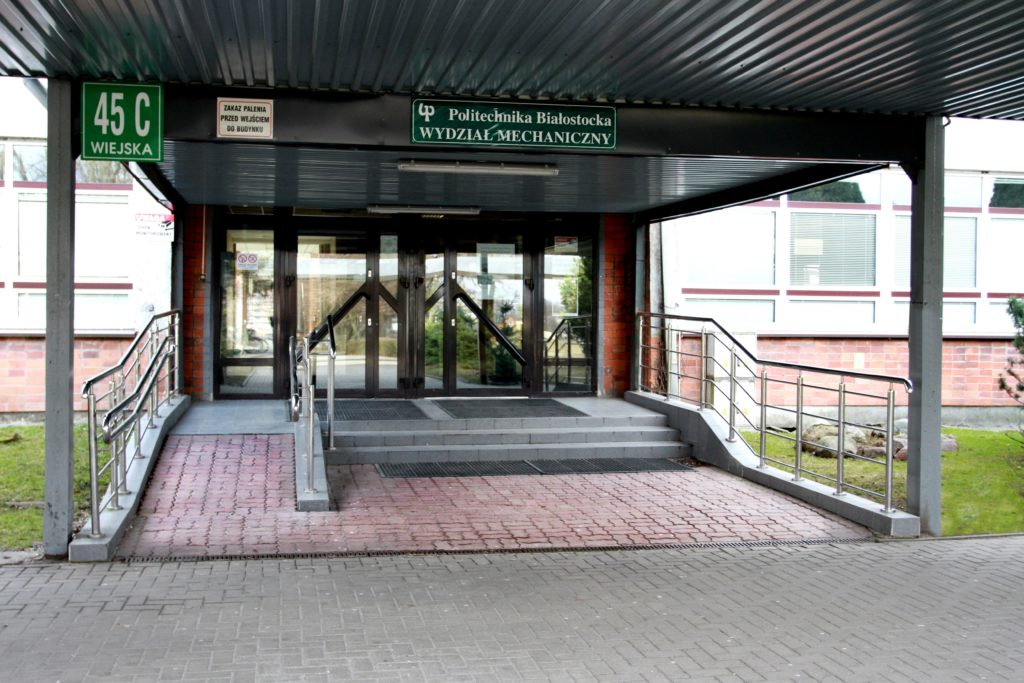

In [ ]:
from IPython.display import Image
Image(filename='WM-PB-front-1024x683.jpg')

In [ ]:
!source /opt/intel/openvino_2021/bin/setupvars.sh && python super_resolution.py --model ./intel/single-image-super-resolution-1033/FP16/single-image-super-resolution-1033.xml WM-PB-front-1024x683.jpg

[setupvars.sh] OpenVINO environment initialized
super_resolution.py:29: DeprecationWarning: 'inputs' property of IENetwork class is deprecated. To access DataPtrs user need to use 'input_data' property of InputInfoPtr objects which can be accessed by 'input_info' property.
  input_blobs = siec.inputs.keys()
Zapisany:  zmiana_WM-PB-front-1024x683.jpg


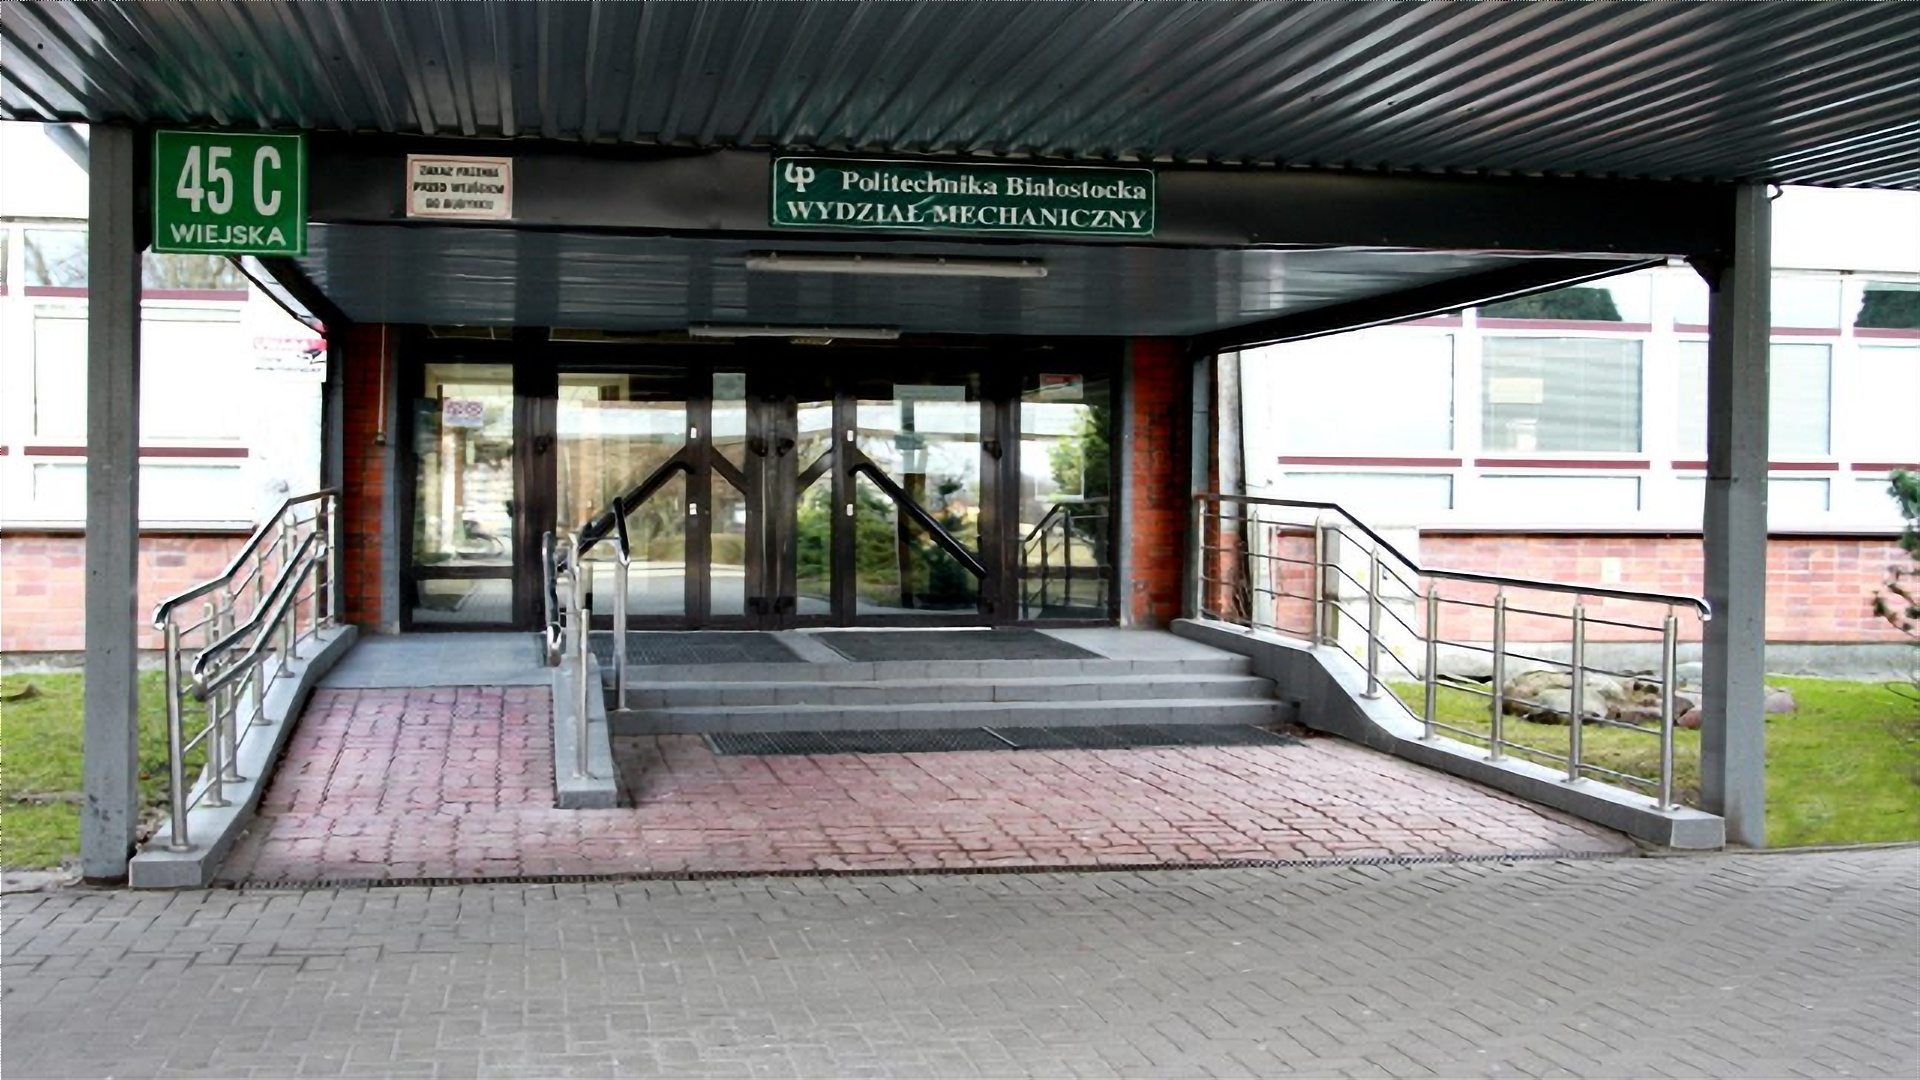

In [ ]:
from IPython.display import Image
Image(filename='zmiana_WM-PB-front-1024x683.jpg')

In [ ]:
import cv2

obraz = cv2.imread('./WM-PB-front-1024x683.jpg')
przeskalowany_obraz = cv2.resize(obraz, (1920, 1080), cv2.INTER_AREA) #ponowne próbkowanie przy użyciu relacji obszaru pikseli
cv2.imwrite('przeskalowany_WM-PB-front-1024x683.jpg', przeskalowany_obraz)

True

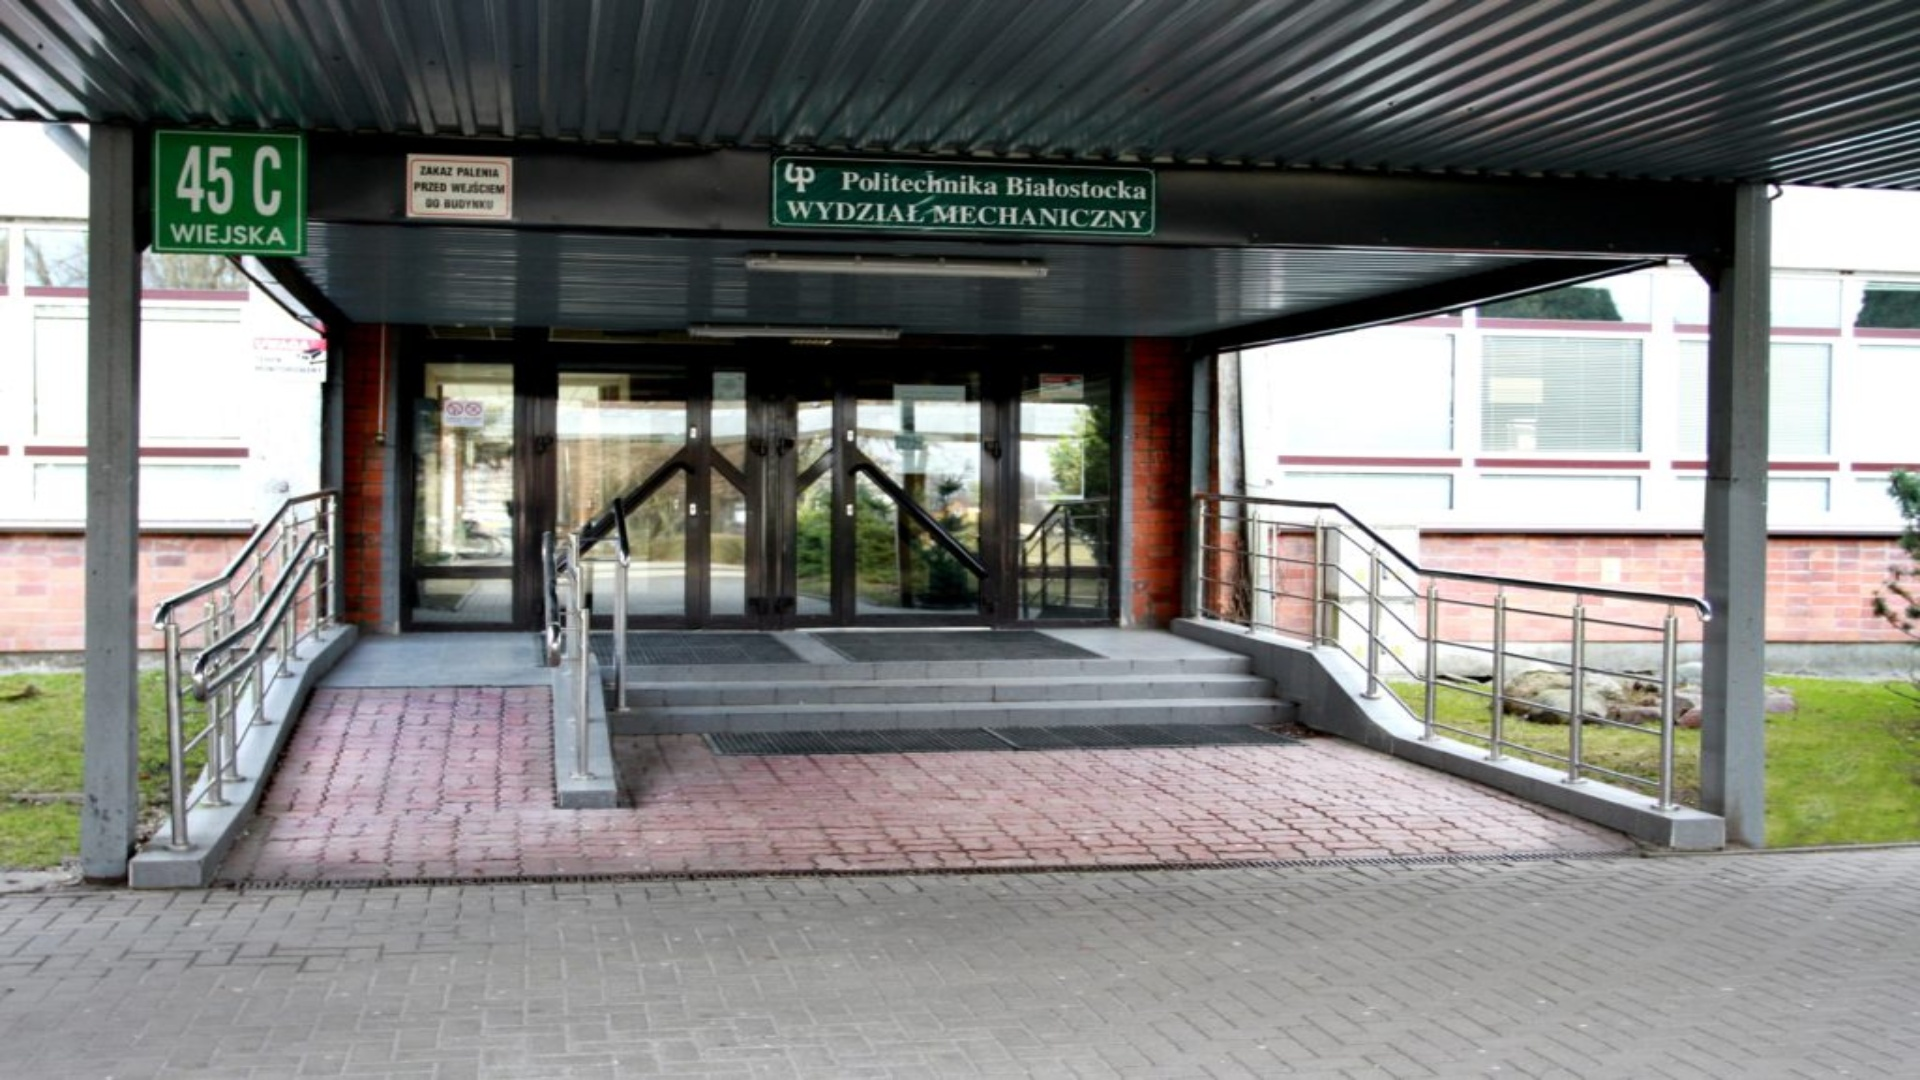

In [ ]:
from IPython.display import Image
Image(filename='przeskalowany_WM-PB-front-1024x683.jpg')

### Analiza
W pierwszym przypadku przy trzykrotnym powiększeniu obrazu tabliczka z napisem "ZAKAZ PALENIA PRZED WEJŚCIEM DO BUDYNKU" została rozmazana. Nie jesteśmy w stanie odczytać znajdującego sie na niej napisu. 
W przypadku przetworzenia przez sieci neuronowe napis stał się bardziej czytelny.

### Wnioski:
* Dzięki właściwościom sieci neronowych,przy zwiększaniu rozdzielczości straty ostrości są mniejsze niż przy tradycjnych metodach.
* W sieciach neuronowych wykorzystywany jest Attention, który pozwala sieci wykryć obszary obrazka o istotnym znaczeniu i zachować ostrość tych obszarów po zwiększeniu rozdzielczości.

### Kolejnym modelem, którym postanowilismy się zająć jest Model Person Vehicle Bike Detection.
Dany model umożliwia wykrywanie ludzi, samochodów, czy rowerów. Detekcja jest bardzo często stosowana w życiu codziennym, np. do śledzenia piłki podczas meczu piłki nożnej, śledzenia ruchu kija do krykieta lub śledzenia osoby w filmie.

Jednym z takich nowatorskich zastosowań analizy obrazu jest wykrywanie zewnętrznych uszkodzeń pojazdów, zarówno w celach ubezpieczeniowych, jak i naprawczych. Różne techniki Deep Learning mogą być wykorzystywane nie tylko do wykrywania uszkodzeń samochodów (takich jak zadrapania, wgniecenia, potłuczone szkło, uszkodzone panele nadwozia), ale także do oszacowania stopnia uszkodzenia i oszacowania kosztów naprawy.

In [ ]:
# pobieranie modelu
!python /opt/intel/openvino_2021/deployment_tools/tools/model_downloader/downloader.py --name person-vehicle-bike-detection-2002

################|| Downloading person-vehicle-bike-detection-2002 ||################

========== Downloading /content/intel/person-vehicle-bike-detection-2002/FP32/person-vehicle-bike-detection-2002.xml
... 100%, 191 KB, 661 KB/s, 0 seconds passed

========== Downloading /content/intel/person-vehicle-bike-detection-2002/FP32/person-vehicle-bike-detection-2002.bin
... 100%, 7114 KB, 9345 KB/s, 0 seconds passed

========== Downloading /content/intel/person-vehicle-bike-detection-2002/FP16/person-vehicle-bike-detection-2002.xml
... 100%, 191 KB, 143715 KB/s, 0 seconds passed

========== Downloading /content/intel/person-vehicle-bike-detection-2002/FP16/person-vehicle-bike-detection-2002.bin
... 100%, 3557 KB, 4886 KB/s, 0 seconds passed

========== Downloading /content/intel/person-vehicle-bike-detection-2002/FP16-INT8/person-vehicle-bike-detection-2002.xml
... 100%, 478 KB, 1054 KB/s, 0 seconds passed

========== Downloading /content/intel/person-vehicle-bike-detection-2002/FP16-INT8/per

In [ ]:
%%writefile person_vehicle_bike.py

from argparse import ArgumentParser
import os
import warnings
import cv2
import skimage
import numpy as np
from openvino.inference_engine import IENetwork, IECore


# Definiowane argumentów skryptu
def budowanie_skryptu():
  parser= ArgumentParser()
  parser.add_argument('--model', type=str, required=True, help='Scieżka do pliku XML z wytrenowanym modelem')
  parser.add_argument('--device', help='Określ urządzenie docelowe do wnioskowania.(default: %(default)s)',
                      choices=['CPU', 'GPU', 'MYRIAD'], default='CPU')
  parser.add_argument('obraz_wejsciowy', help='Obraz')
  return parser.parse_args()

# Wczytywaniu modelu
def wczytanie_modelu(model_xml, device):
    model_bin = os.path.splitext(model_xml)[0] + '.bin' #służy do podziału nazwy ścieżki 
    #log.info("Creating Inference Engine")
    ie = IECore()
    siec = ie.read_network(model=model_xml, weights=model_bin)
    exec_net = ie.load_network(network=siec, device_name="CPU", num_requests=1) #Ładuje sieć odczytaną z reprezentacji pośredniej (IR)

    input_blobs = siec.inputs.keys()
    inputs = [(b, siec.inputs[b].shape) for b in input_blobs]

    y = next(iter(siec.outputs))
    del siec

    return exec_net, inputs, y

# Wczytywanie obrazka jako macierzy
def obraz_macierz(obraz, rozmiar):
    macierz = obraz.copy()
    macierz = macierz.transpose((2, 0, 1))  # konwertowanie obrazu z HWC do CHW
    macierz = macierz.reshape(rozmiar)
    return macierz


# Wczytywanie macierzy jako obrazka
def macierz_to_img(macierz):
    macierz = macierz.transpose((1, 2, 0))   # konwertowanie obrazu z CHW do HWC
    macierz = np.clip(blob, 0.0, 1.0)
    macierz = skimage.img_as_ubyte(macierz)
    return macierz

def main():
    args = budowanie_skryptu()
    exec_net, inputs, out_blob = wczytanie_modelu(args.model, args.device)

    # wczytywanie obrazka
    ih, iw = inputs[0][1][2:]
    obraz = cv2.imread(args.obraz_wejsciowy)
    obraz_wyjsciowy = obraz.copy()
    wys, szer = obraz_wyjsciowy.shape[0], obraz_wyjsciowy.shape[1]

    # Dopasowywanie rozmiaru obrazka wejściowego
    if obraz.shape[0] != ih or obraz.shape[1] != iw:
        obraz = cv2.resize(obraz, (iw, ih), cv2.INTER_AREA)

    blob1 = obraz_macierz(obraz, (inputs[0][1]))

    # Wysyłamy obrazek wejściowy do sieci
    wynik = exec_net.infer(inputs={inputs[0][0]: blob1})

    # Mapowanie kolorów prostokątów do indeksów wykrywanych klas
    colors = {0: (0,255,0),
              1: (0,0,255),
              2: (255,0,0)}

    for detection in wynik['detection_out'][0][0]:
      result_class = detection[1]
      confidence = detection[2]
      if confidence > 0.5:
        print(detection)
        x_min = int(detection[3] * szer)
        y_min = int(detection[4] * wys)
        x_max = int(detection[5] * szer)
        y_max = int(detection[6] * wys)

        # rysujemy na obrazku z wynikiem prostokąt wskazujący gdzie znajduje się
        # wykryty obiekt
        obraz_wyjsciowy = cv2.rectangle(cv2.UMat(obraz_wyjsciowy), (x_min,y_min), (x_max,y_max),
                                  colors[result_class], 1)
    
    cv2.imwrite('wynik.jpg', obraz_wyjsciowy)
    print('Obraz wynikowy zapisany jako wynik.jpg')

if __name__ == '__main__':
    main()

Overwriting person_vehicle_bike.py


In [ ]:
!wget https://d2p6e6u75xmxt8.cloudfront.net/5/2019/05/14.JPG-1024x726.jpg

--2021-06-14 14:07:19--  https://d2p6e6u75xmxt8.cloudfront.net/5/2019/05/14.JPG-1024x726.jpg
Resolving d2p6e6u75xmxt8.cloudfront.net (d2p6e6u75xmxt8.cloudfront.net)... 13.35.115.227, 13.35.115.201, 13.35.115.133, ...
Connecting to d2p6e6u75xmxt8.cloudfront.net (d2p6e6u75xmxt8.cloudfront.net)|13.35.115.227|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 235704 (230K) [image/jpeg]
Saving to: ‘14.JPG-1024x726.jpg’

14.JPG-1024x726.jpg 100%[===================>] 230.18K   824KB/s    in 0.3s    

2021-06-14 14:07:20 (824 KB/s) - ‘14.JPG-1024x726.jpg’ saved [235704/235704]



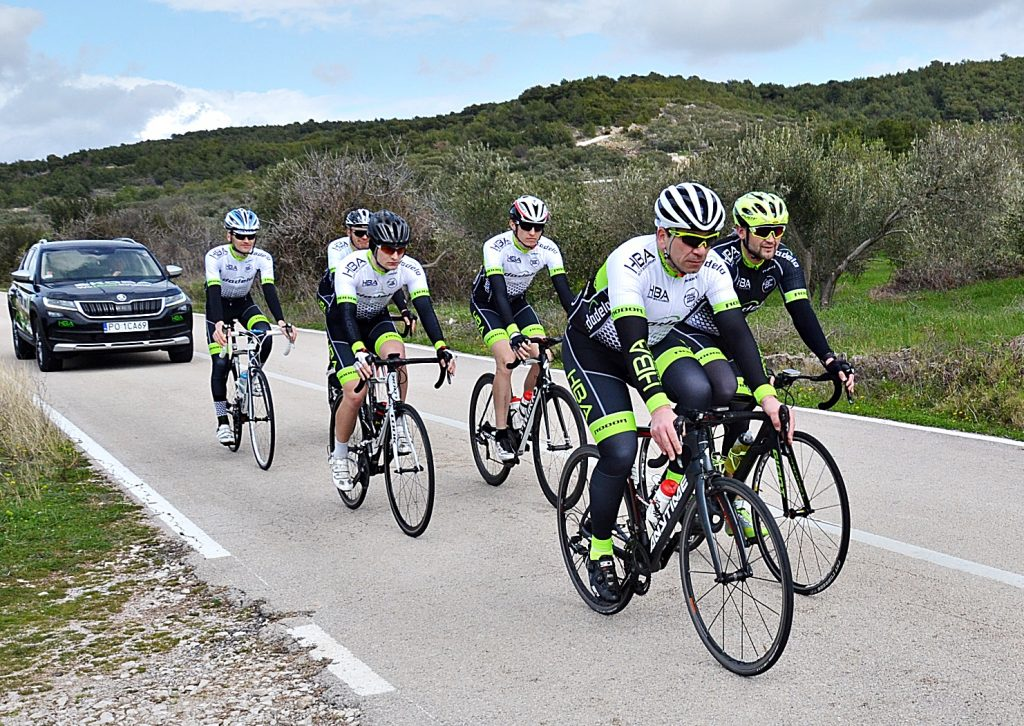

In [ ]:
from IPython.display import Image
Image(filename='14.JPG-1024x726.jpg')

In [ ]:
!source /opt/intel/openvino_2021/bin/setupvars.sh && \
 python person_vehicle_bike.py --model ./intel/person-vehicle-bike-detection-2002/FP16/person-vehicle-bike-detection-2002.xml 14.JPG-1024x726.jpg

[setupvars.sh] OpenVINO environment initialized
person_vehicle_bike.py:28: DeprecationWarning: 'inputs' property of IENetwork class is deprecated. To access DataPtrs user need to use 'input_data' property of InputInfoPtr objects which can be accessed by 'input_info' property.
  input_blobs = siec.inputs.keys()
[0.         0.         0.7624559  0.5326143  0.42017663 0.8067525
 0.89346325]
[0.         1.         0.9731863  0.46240276 0.27708548 0.57169646
 0.5624    ]
[0.         1.         0.9621393  0.31700912 0.28831404 0.44049415
 0.6781751 ]
[0.         1.         0.946003   0.19548729 0.29072264 0.28047863
 0.6287656 ]
[0.         1.         0.9060849  0.6821691  0.26912093 0.8305197
 0.56928366]
[0.         1.         0.86799407 0.5874929  0.24914272 0.7817003
 0.73810995]
[0.         2.         0.5155189  0.31561342 0.28725034 0.43998095
 0.69686556]
Obraz wynikowy zapisany jako wynik.jpg


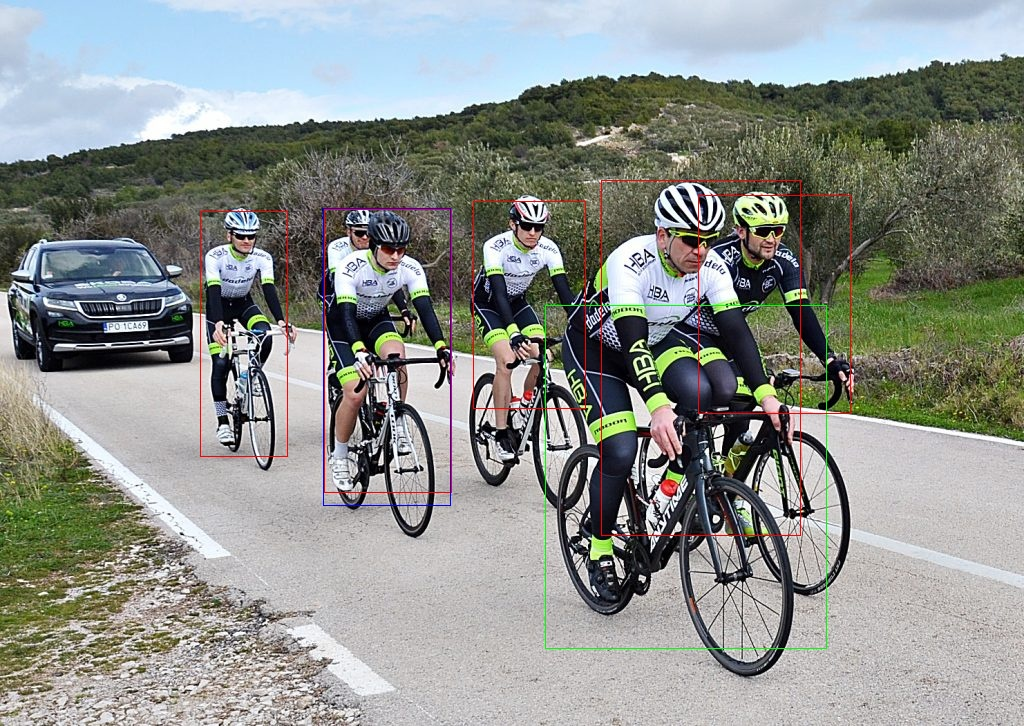

In [ ]:
from IPython.display import Image
Image(filename='wynik.jpg')

In [ ]:
!wget https://www.rmf.fm/_files/Short_foto/625/afed553cf1144284fb999dacb472a115.jpg

--2021-06-14 14:11:31--  https://www.rmf.fm/_files/Short_foto/625/afed553cf1144284fb999dacb472a115.jpg
Resolving www.rmf.fm (www.rmf.fm)... 217.74.66.211, 185.69.193.123
Connecting to www.rmf.fm (www.rmf.fm)|217.74.66.211|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 92428 (90K) [image/jpeg]
Saving to: ‘afed553cf1144284fb999dacb472a115.jpg’

afed553cf1144284fb9 100%[===================>]  90.26K   255KB/s    in 0.4s    

2021-06-14 14:11:32 (255 KB/s) - ‘afed553cf1144284fb999dacb472a115.jpg’ saved [92428/92428]



In [ ]:
!source /opt/intel/openvino_2021/bin/setupvars.sh && \
 python person_vehicle_bike.py --model ./intel/person-vehicle-bike-detection-2002/FP16/person-vehicle-bike-detection-2002.xml afed553cf1144284fb999dacb472a115.jpg

[setupvars.sh] OpenVINO environment initialized
person_vehicle_bike.py:28: DeprecationWarning: 'inputs' property of IENetwork class is deprecated. To access DataPtrs user need to use 'input_data' property of InputInfoPtr objects which can be accessed by 'input_info' property.
  input_blobs = siec.inputs.keys()
[0.         1.         0.99848264 0.32484302 0.4356592  0.4809099
 0.99403644]
[0.         1.         0.99593145 0.20705418 0.5895025  0.3422224
 0.99662596]
[0.         1.         0.9913327  0.46664527 0.6830108  0.5402906
 1.0019797 ]
Obraz wynikowy zapisany jako wynik.jpg


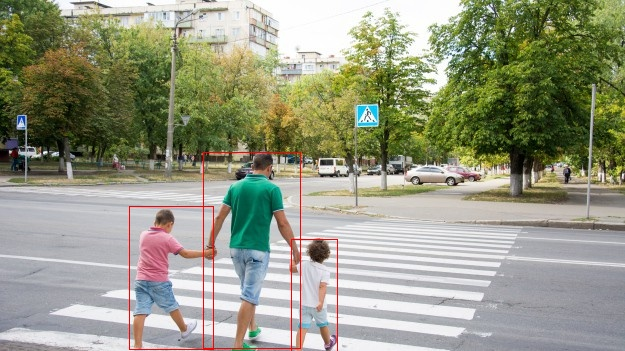

In [ ]:
from IPython.display import Image
Image(filename='wynik.jpg')

In [ ]:
!wget https://d-mf.ppstatic.pl/art/8q/49/gqq2s1cs00s48kkwcgco4/renault_-jpg.1200.jpg

--2021-06-05 12:07:18--  https://d-mf.ppstatic.pl/art/8q/49/gqq2s1cs00s48kkwcgco4/renault_-jpg.1200.jpg
Resolving d-mf.ppstatic.pl (d-mf.ppstatic.pl)... 195.8.99.3, 2a02:1320:ffff:0:195:8:99:3
Connecting to d-mf.ppstatic.pl (d-mf.ppstatic.pl)|195.8.99.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 106282 (104K) [image/jpeg]
Saving to: ‘renault_-jpg.1200.jpg’

renault_-jpg.1200.j 100%[===================>] 103.79K   302KB/s    in 0.3s    

2021-06-05 12:07:19 (302 KB/s) - ‘renault_-jpg.1200.jpg’ saved [106282/106282]



In [ ]:
!source /opt/intel/openvino_2021/bin/setupvars.sh && \
 python person_vehicle_bike.py --model ./intel/person-vehicle-bike-detection-2002/FP16/person-vehicle-bike-detection-2002.xml renault_-jpg.1200.jpg

[setupvars.sh] OpenVINO environment initialized
person_vehicle_bike.py:28: DeprecationWarning: 'inputs' property of IENetwork class is deprecated. To access DataPtrs user need to use 'input_data' property of InputInfoPtr objects which can be accessed by 'input_info' property.
  input_blobs = siec.inputs.keys()
[0.         0.         0.9938407  0.10177669 0.30694818 0.621928
 0.78499436]
[0.         1.         0.99791926 0.815345   0.15491995 0.94874686
 0.80737364]
Obraz wynikowy zapisany jako wynik.jpg


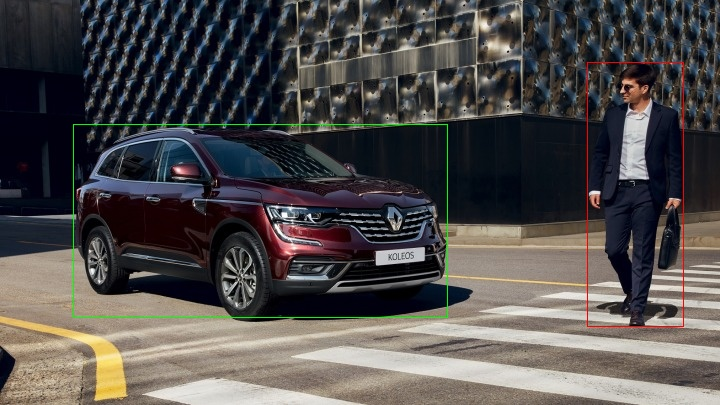

In [ ]:
from IPython.display import Image
Image(filename='wynik.jpg')

Detektor (osoby/pojazdu/roweru) oparty jest na architekturze wykrywania SSD, sieci szkieletowej RMNet i uczeniu się bloku skalowania obrazu. 

### Wnioski
Na podstawie wybranych zdjęć można zauważyć, że Model Person Vehicle Bike Detection doskonale nadaje się do zastosowań związanych z nadzorem bezpieczeństwa i działa w różnych scenach i warunkach pogodowych/oświetleniowych.

### Road Segmentation
Kolejny model, którym się zajmiemy jest Road Segmentation, który wskazuje konkretne piksele przynależe do wykrywanych obiektów.

Taki rodzaj detekcji jest szczególnie przydatny np. dla sieci neuronowych w dziedzinie autonomicznych pojazdów: model Road Segmentation umożliwia wykrycie na obrazku fragmentów drogi, krawężników i pasów drogowych.

In [ ]:
# pobieranie modelu
!python /opt/intel/openvino_2021/deployment_tools/tools/model_downloader/downloader.py --name road-segmentation-adas-0001

################|| Downloading road-segmentation-adas-0001 ||################

========== Downloading /content/intel/road-segmentation-adas-0001/FP32/road-segmentation-adas-0001.xml
... 100%, 384 KB, 1411 KB/s, 0 seconds passed

========== Downloading /content/intel/road-segmentation-adas-0001/FP32/road-segmentation-adas-0001.bin
... 100%, 719 KB, 2079 KB/s, 0 seconds passed

========== Downloading /content/intel/road-segmentation-adas-0001/FP16/road-segmentation-adas-0001.xml
... 100%, 384 KB, 1448 KB/s, 0 seconds passed

========== Downloading /content/intel/road-segmentation-adas-0001/FP16/road-segmentation-adas-0001.bin
... 100%, 359 KB, 1347 KB/s, 0 seconds passed

========== Downloading /content/intel/road-segmentation-adas-0001/FP16-INT8/road-segmentation-adas-0001.xml
... 100%, 1092 KB, 2745 KB/s, 0 seconds passed

========== Downloading /content/intel/road-segmentation-adas-0001/FP16-INT8/road-segmentation-adas-0001.bin
... 100%, 207 KB, 76483 KB/s, 0 seconds passed



In [ ]:
%%writefile road_segmentation.py

from argparse import ArgumentParser
import os
import warnings
import cv2
import skimage
import skimage.color
import numpy as np
from openvino.inference_engine import IENetwork, IECore


# Definiowane argumentów skryptu
def budowanie_skryptu():
  parser= ArgumentParser()
  parser.add_argument('--model', type=str, required=True, help='Scieżka do pliku XML z wytrenowanym modelem')
  parser.add_argument('--device', help='Określ urządzenie docelowe do wnioskowania.(default: %(default)s)',
                      choices=['CPU', 'GPU', 'MYRIAD'], default='CPU')
  parser.add_argument('obraz_wejsciowy', help='Obraz')
  return parser.parse_args()

# Wczytywaniu modelu
def wczytanie_modelu(model_xml, device):
    model_bin = os.path.splitext(model_xml)[0] + '.bin' #służy do podziału nazwy ścieżki 
    #log.info("Creating Inference Engine")
    ie = IECore()
    siec = ie.read_network(model=model_xml, weights=model_bin)
    exec_net = ie.load_network(network=siec, device_name="CPU", num_requests=1) #Ładuje sieć odczytaną z reprezentacji pośredniej (IR)

    input_blobs = siec.inputs.keys()
    inputs = [(b, siec.inputs[b].shape) for b in input_blobs]

    y = next(iter(siec.outputs))
    del siec

    return exec_net, inputs, y

# Wczytywanie obrazka jako macierzy
def obraz_macierz(obraz, rozmiar):
    macierz = obraz.copy()
    macierz = macierz.transpose((2, 0, 1))  # konwertowanie obrazu z HWC do CHW
    macierz = macierz.reshape(rozmiar)
    return macierz


# Wczytywanie macierzy jako obrazka
def macierz_to_img(macierz):
    macierz = macierz.transpose((1, 2, 0))   # konwertowanie obrazu z CHW do HWC
    macierz = np.clip(macierz, 0.0, 1.0)
    macierz = skimage.img_as_ubyte(macierz)
    return macierz

def main():
    args = budowanie_skryptu()
    exec_net, inputs, out_blob = wczytanie_modelu(args.model, args.device)

    # wczytywanie obrazka
    ih, iw = inputs[0][1][2:]
    obraz = cv2.imread(args.obraz_wejsciowy)
    obraz_wyjsciowy = obraz.copy()
    wys, szer = obraz_wyjsciowy.shape[0], obraz_wyjsciowy.shape[1]

    # Dopasowywanie rozmiaru obrazka wejściowego
    if obraz.shape[0] != ih or obraz.shape[1] != iw:
        obraz = cv2.resize(obraz, (iw, ih), cv2.INTER_AREA)

    blob1 = obraz_macierz(obraz, (inputs[0][1]))

    # Wysyłamy obrazek wejściowy do sieci
    wynik = exec_net.infer(inputs={inputs[0][0]: blob1})

    obraz_wyjsciowy = obraz.copy()
    feature_map = wynik['L0317_ReWeight_SoftMax']

    # najpierw zamieniamy macierze prawdopodobieństw na macierze z zerami gdy
    # prawdopodobienśtwo dla danego piksela < 0.5 i jedynkami gdy prawdpodobieństwo dla danego piksela
    # >= 0.5
    masks = [np.rint(feature_map[0][i]) for i in range(feature_map.shape[1])]

    # następnie macierze z zerami/jedykami zmieniamy na macierze z zerami i indeksami danych klas
    labels = [mask * i for i, mask in enumerate(masks)]
    
    # następnie łączymy macierz w jedną
    merged_labels = np.maximum(labels[0], labels[1])
    for label in labels[1:]:
      merged_labels = np.maximum(merged_labels, label)

    obraz_wyjsciowy = skimage.color.label2rgb(merged_labels, image=obraz_wyjsciowy, bg_label=0)
    obraz_wyjsciowy = skimage.img_as_ubyte(obraz_wyjsciowy)
    cv2.imwrite('wynik.jpg', obraz_wyjsciowy)
    print('Obraz zostal zapisany jako wynik.jpg')

if __name__ == '__main__':
    main()

Overwriting road_segmentation.py


In [ ]:
!wget https://live.staticflickr.com/3598/3477469590_ccb1162f26.jpg

--2021-06-14 18:29:21--  https://live.staticflickr.com/3598/3477469590_ccb1162f26.jpg
Resolving live.staticflickr.com (live.staticflickr.com)... 99.84.213.150, 2600:9000:2199:5a00:0:5a51:64c9:c681, 2600:9000:2199:400:0:5a51:64c9:c681, ...
Connecting to live.staticflickr.com (live.staticflickr.com)|99.84.213.150|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [image/jpeg]
Saving to: ‘3477469590_ccb1162f26.jpg’

3477469590_ccb1162f     [ <=>                ]  56.80K  --.-KB/s    in 0.001s  

2021-06-14 18:29:21 (38.5 MB/s) - ‘3477469590_ccb1162f26.jpg’ saved [58162]



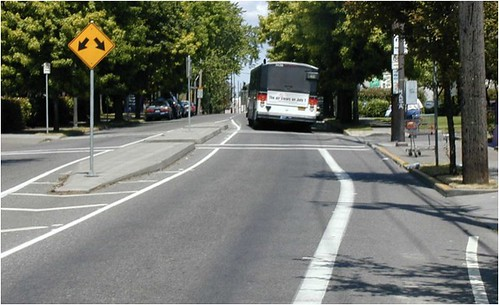

In [ ]:
from IPython.display import Image
Image(filename='3477469590_ccb1162f26.jpg')

In [ ]:
!source /opt/intel/openvino_2021/bin/setupvars.sh && \
python road_segmentation.py --model ./intel/road-segmentation-adas-0001/FP32/road-segmentation-adas-0001.xml \
 3477469590_ccb1162f26.jpg

[setupvars.sh] OpenVINO environment initialized
road_segmentation.py:29: DeprecationWarning: 'inputs' property of IENetwork class is deprecated. To access DataPtrs user need to use 'input_data' property of InputInfoPtr objects which can be accessed by 'input_info' property.
  input_blobs = siec.inputs.keys()
/usr/local/lib/python3.7/dist-packages/skimage/util/dtype.py:226: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  dtypeobj_out = np.dtype(dtype)
Obraz zostal zapisany jako wynik.jpg


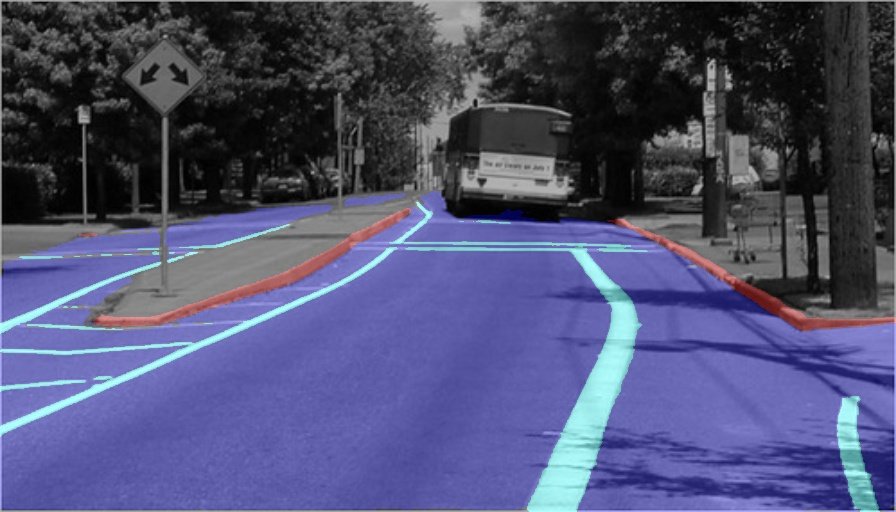

In [ ]:
from IPython.display import Image
Image(filename='wynik.jpg')

### Wykrywanie twarzy za pomocą zdjęć wykonanych kamerką

Wykrywanie twarzy jest możliwe nie tylko dzięki narzędziu OpenVino, ale również OpenCV2. Narzędzie dostarcza nam klas, przy pomocy których w szybki i prosty sposób jesteśmy wykryć chociażby twarz.

<IPython.core.display.Javascript object>

(480, 640)
Zapisano do photo.jpg


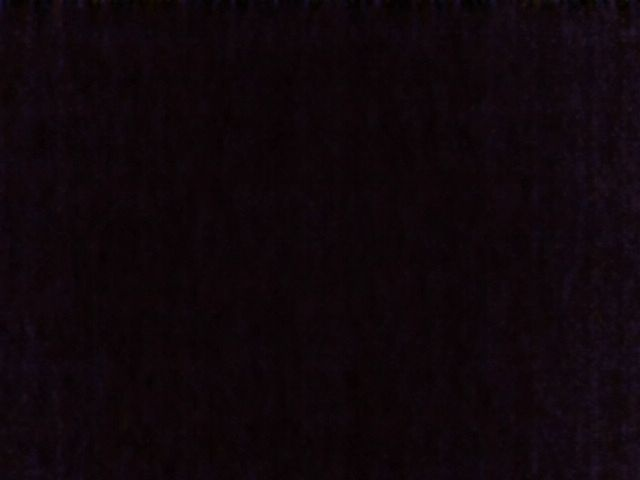

In [ ]:
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time


#Konwersja skryptu na obraz OpenCV
def konwertowanie_na_obraz(obiekt):
  dekodowanyobraz = b64decode(obiekt.split(',')[1])
  obraz = cv2.imdecode(np.frombuffer(dekodowanyobraz, dtype=np.uint8), flags=1)

  return obraz

#Wygenerowanie ramki 
def rameczka(tablica):
  ramka_PIL = PIL.Image.fromarray(tablica, 'RGBA')
  ramka_PIL.save(io.BytesIO(), format='png')
  ramka_b = 'dane:obraz/png;base64,{}'.format((str(b64encode(x.getvalue()), 'utf-8')))

  return ramka_b

#Inicjalizacja wykrycia twarzy
twarz = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

#Funkcja ze skryptem do zrobienia zdjęcia
def zrob_zdj(plik='photo.jpg', jakosc=0.8):
  kod = Javascript('''
    async function zrobZdjecie(jakosc) {
      const sekcja = document.createElement('div');
      const wylap = document.createElement('button');
      wylap.textContent = 'Wcisnij aby zrobic zdjecie';
      sekcja.appendChild(wylap);

      const video = document.createElement('video');
      video.style.display = 'block';
      const strumien = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(sekcja);
      sekcja.appendChild(video);
      video.srcObject = strumien;
      await video.play();


      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      await new Promise((wynik) => wylap.onclick = wynik);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      strumien.getVideoTracks()[0].stop();
      sekcja.remove();
      return canvas.toDataURL('image/jpeg', jakosc);
    }
    ''')
  display(kod)


  dane = eval_js('zrobZdjecie({})'.format(jakosc))
  obraz = konwertowanie_na_obraz(dane) 
  szary = cv2.cvtColor(obraz, cv2.COLOR_RGB2GRAY)
  print(szary.shape)
  twarze = twarz.detectMultiScale(szary)
  for (x,y,w,h) in twarze:
      obraz = cv2.rectangle(obraz,(x,y),(x+w,y+h),(255,0,0),2)
  cv2.imwrite(plik, obraz)

  return plik

#Wywołanie z obsługą błędu
try:
  plik = zrob_zdj('photo.jpg')
  print('Zapisano do {}'.format(plik))
  display(Image(plik))
except Exception as err:
  print("Blad")
  print(str(err))

#https://pillow.readthedocs.io/en/stable/reference/Image.html
#https://docs.opencv.org/3.4/db/d28/tutorial_cascade_classifier.html
#https://docs.opencv.org/3.4/d1/de5/classcv_1_1CascadeClassifier.html


### Wnioski
*Widzenie komputerowe wykorzystuje głębokie uczenie do tworzenia sieci neuronowych, które kierują systemami podczas przetwarzania i analizy obrazu. Po pełnym przeszkoleniu komputerowe modele wizyjne mogą rozpoznawać obiekty, wykrywać i rozpoznawać ludzi, a nawet śledzić ruch.

*Dzięki rozpoznawaniu obiektów, inteligentne miasta mogą śledzić pojazdy i dostosowywać czasy sygnalizacji świetlnej w celu złagodzenia zatorów, producenci mogą identyfikować wady, a sprzedawcy detaliczni mogą usprawnić zarządzanie zapasami.